In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# getting the data ready

In [116]:
# dataset=pd.read_csv("soppind_data.csv")
x=pd.read_csv("trainee.csv").values
y=pd.read_csv("outputee.csv").values

# splitting data into test and train

In [123]:
split=int(y.shape[0]*0.8)
split

2400

In [124]:
x_train=x[:split,:]
y_train=y[:split]
x_test=x[split:]
y_test=y[split:]

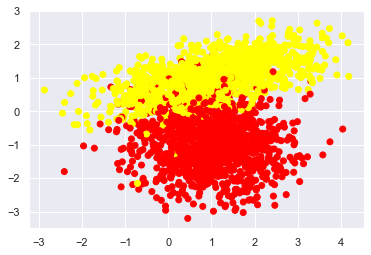

In [125]:
plt.scatter(x_train[:,1],x_train[:,2],c=y_train,cmap=plt.cm.autumn_r)
plt.show()

# normalising our data

In [126]:
mean=x_train.mean(axis=0)
mean

array([0.03004797, 1.00214514, 0.06510056])

In [127]:
stdv=x_train.std(axis=0)
stdv

array([1.34432603, 1.02858322, 1.19852815])

In [128]:
x_train=(x_train-mean)/stdv

### we can observe that after normalisation the data has shifted towards the origin with mean=0

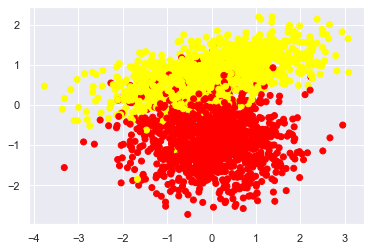

In [129]:
plt.scatter(x_train[:,1],x_train[:,2],c=y_train,cmap=plt.cm.autumn_r)
plt.show()

# Logistic Regression SCRATCH CODE

In [130]:
x_train.shape

(2400, 3)

#### changing the shape of x_train accordingly to n+1
theta=[theta0,theta1,theta2,theta3]

In [131]:
add=np.ones((x_train.shape[0],1))
x_train=np.array(x_train)

In [132]:
x_train.shape

(2400, 3)

In [133]:
x_train_new=np.hstack((add,x_train))

In [134]:
x_train_new.shape

(2400, 4)

In [135]:
x_train[:2]

array([[-0.94428182, -0.24601184, -0.49528704],
       [-0.79305037, -0.19513135, -1.1253904 ]])

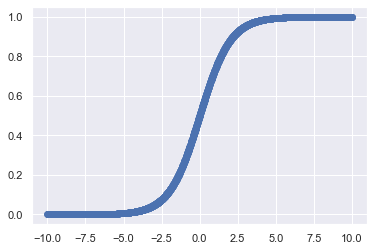

In [136]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))
# lets plot it
p=np.linspace(-10,10,2000)
plt.scatter(p,sigmoid(p))
sns.set_theme()
plt.show()

In [137]:

def hypothesis(x,theta):
    #  x is full x_train-(m,n+1)-n+1 are no of columns
    # theta eill have a shape of[n+1,1]
    
    # method 1 for applying sigmoid
    # g_x=1/(1+math.exp**(-theta_t*x))
    # return h_x
    
    # method-2
    return sigmoid(np.dot(x,theta))

### log loss

In [138]:
# now we will define an function called error which will return the logloss
def error(x,y,theta,m=y.shape[0]):
    h_x=hypothesis(x_train_new,theta)
    # methos-2 vectorised form
    loss=-1*np.mean(y*(np.log(h_x))+(1-y)*(np.log(1-h_x)))
    return loss

 # method-1 using for loop
    # loss=0
    # for i in range(m):
        # loss+=(y[i]*(np.log10(h_x[i]))+(1-y[i])*(np.log(1-h_x[i])))
    # return -(loss/m)

In [139]:
from numpy import zeros


def gradient_calculator(theta,x,y,m=y.shape[0]):
    gradient=np.zeros((x.shape[1],1))
    h_x=hypothesis(x,theta)
    # x-shape=[m,n+1]-we have to get the transpose of x
    # h_x shape=[m,1]
    # gradient-shape=[n+1,1]
    gradient=np.dot(np.transpose(x),(y-h_x))
    return gradient/m


In [140]:

def gradient_descent(x,y,n_steps=500,lr=0.1):
    # define theta 
    theta_list=[]
    error_list=[]
    # x-shape-(rows,no_of_features)
    n=x_train_new.shape[1]
    theta=np.zeros((n,1))
    for i in range(n_steps):
        errr=error(x_train_new,y_train,theta)
        error_list.append(errr)
        gradient=gradient_calculator(theta,x_train_new,y_train)
        theta=theta+lr*gradient
        theta_list.append(theta)
    final_theta=theta
    return (final_theta,theta_list,error_list)



In [141]:
final_theta,theta_list,error_list=gradient_descent(x_train_new,y_train)

In [142]:
theta_list=np.array(theta_list)

In [143]:
theta_list=np.reshape(theta_list,(theta_list.shape[0],theta_list.shape[1]))

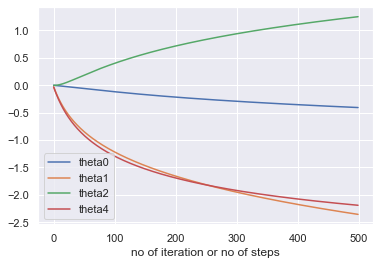

In [150]:
plt.plot(theta_list,label=('theta0','theta1','theta2','theta4'))
plt.legend()
plt.xlabel("no of iteration or no of steps")
plt.show()


# visualising error

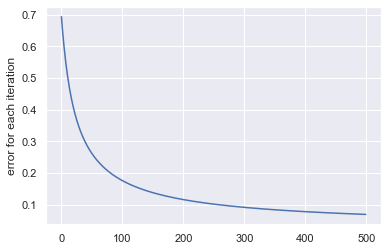

In [145]:
plt.plot(error_list)
plt.ylabel('error for each iteration')
plt.show()

#### how the error changes with the theta's 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21132\2873577020.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes=graph.gca(projection='3d')


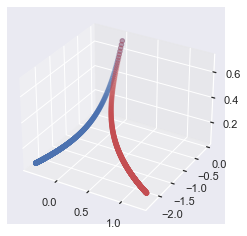

In [175]:
graph=plt.figure()
axes=graph.gca(projection='3d')

axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
axes.scatter(theta_list[:,2],theta_list[:,3],error_list,c='r')

plt.show()

# accuracy for our logistic regressor algo

In [146]:
def predict(x,theta):
    confidence=hypothesis(x,theta)
    output=np.zeros(confidence.shape)
    output[confidence>=0.5]=1
    output=output.astype('int')
    return output



In [151]:
def accuracy_percentage(x,final_theta):
    y_pred=predict(x_test_new,final_theta)
    a=np.sum(y_pred==y_test)
    return (a/y_pred.shape[0])*100
mean_test=x_test.mean(axis=0)
std_test=x_test.std(axis=0)
x_test=(x_test-mean_test)/std_test
add1=np.ones((x_test.shape[0],1))
x_test_new=np.hstack((add1,x_test))
# normalising test data

accuracy_percentage(x_test_new,final_theta)

99.16666666666667

# visualising our line
### we have to assume the relation as theta0+theta1* x1+theta2* x2=0 to draw line 